Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way.

In [2]:
q1, q2, p1, p2, y = symbols('q1 q2 p1 p2 y')

# 1.1. Cobb-Douglas (CD) Utility Function

## Define a utility function

Define a CD utility function:

In [3]:
# define alpha as a rational number of 1/2
alpha = Rational(1,2)
# define parameter beta as 1 - alpha
beta = 1 - alpha
# Note: in sympy syntax: use double star ** for power
u = q1**(alpha) * q2**(beta)
# show the defined function
u

Calculate marginal utility with respect to $q_1$

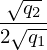

In [4]:
# Note: in sympy 
mu1 = u.diff(q1)
mu1

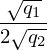

In [5]:
mu2 = u.diff(q2)
mu2

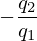

In [24]:
mrs = simplify(mu1 / mu2)
mrs

## Visualize the utility function in 3D

In [7]:
# import plot3d function from sympy
from sympy.plotting import plot3d
# enable package matplotlib, and its notebook model to display the plot in a plot window 
# (allowing rotation of the 3d plot) 
%matplotlib notebook
import matplotlib.pyplot as plt

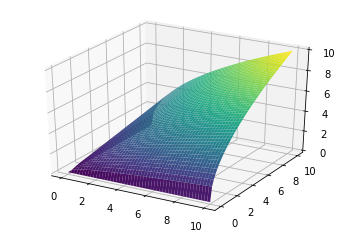

In [23]:
plot3d(u, (q1,0,10), (q2,0,10))

Plot the indifference curve that has utility level of 5

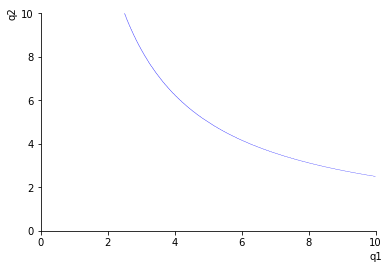

In [9]:
# set matplotlib to inline model for faster display (don't need the interactive window for 2d plots)
%matplotlib inline
# plot an implicit function of q2 in terms of q1 defined by: u(q1,q2) = 5
# note: this function becomes very slow if alpha != 1/2
plot_implicit(Eq(u, 5), (q1,0,10), (q2,0,10))

## Derive the expression for the indifference curve

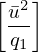

In [10]:
# define a new symbol ubar
ubar = symbols('ubar')
# explicitly solve for the indifference curve: q2 as a function of ubar and q1
indiff_sol = solve(Eq(u, ubar), q2)
# show the expression of the indifference curve
indiff_sol

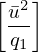

In [25]:
indiff_sol = solve(u - ubar, q2)
indiff_sol

Note the square brackets around the above output, this indicates that indiff_sol is a list with one element (not just the element itself). This feature is handy because the solution may not be unique (e.g. solution to a quadratic equation).

We can ask python about the type of the object using: type(indiff_sol).

In [11]:
type(indiff_sol)

list

In this case, we only want the element (the solution), we access it using the index.

Python index starts with 0, so indiff[0] is the 1st element, indiff[1] is the 2nd, etc.

In [12]:
indiff_sol[0]

Nice! Now we call this element (the solution we want): indiff

In [13]:
indiff = indiff_sol[0]
indiff

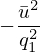

In [14]:
indiff.diff(q1)

One essential algebraic operation is substitution. 

One of the main reasons for substitution is to evaluate an expression at particular values.

For example, what is the expression of $q_2$ in terms of $q_1$ when $\overline{u}=5$?

The sympy package uses a method: subs

In [15]:
# subsitute ubar in indiff with value 5
indiff.subs(ubar, 5)

## Plot indifference curves

Now we try to plot the indifference curve again, but using the explicit expression we derived above.

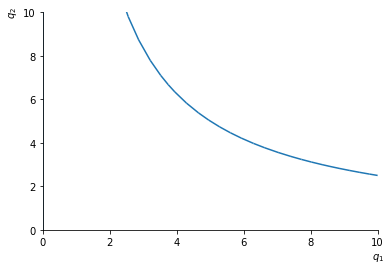

In [16]:
# use plot function directly
plot(indiff.subs(ubar, 5), xlim=[0,10], ylim=[0,10], xlabel="$q_1$", ylabel="$q_2$")

Sometimes, we don't want to see the plot just yet. 

Python allows us to store the graph with a name. 

In addition, we add an option: 'show=False' to suppress the output for now.

In [17]:
plot1 = plot(indiff.subs(ubar, 5), xlim=[0,10], ylim=[0,10], xlabel="$q_1$", ylabel="$q_2$", show=False)

We can use the show() method to print the plot when we want. Don't forget the brackets (some methods just need those...)

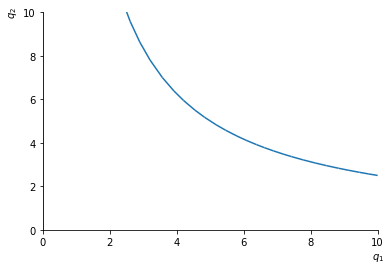

In [18]:
plot1.show()

Now let's try something fancier. We are going to plot a graph with multiple indifference curves.

To do this, we need to (1) create a few different curves and store them, then (2) show them together.

In [19]:
indiff_plot1 = plot(indiff.subs(ubar, 1), xlim=[0,10], ylim=[0,10], xlabel="$q_1$", ylabel="$q_2$", show=False)
indiff_plot2 = plot(indiff.subs(ubar, 2), xlim=[0,10], ylim=[0,10], xlabel="$q_1$", ylabel="$q_2$", show=False)
indiff_plot3 = plot(indiff.subs(ubar, 3), xlim=[0,10], ylim=[0,10], xlabel="$q_1$", ylabel="$q_2$", show=False)
indiff_plot4 = plot(indiff.subs(ubar, 4), xlim=[0,10], ylim=[0,10], xlabel="$q_1$", ylabel="$q_2$", show=False)
indiff_plot5 = plot(indiff.subs(ubar, 5), xlim=[0,10], ylim=[0,10], xlabel="$q_1$", ylabel="$q_2$", show=False)

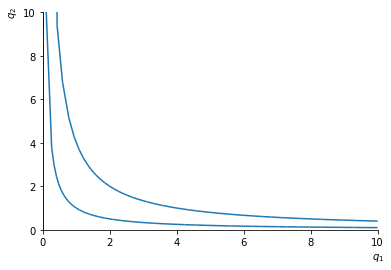

In [20]:
indiff_plot_combo = indiff_plot1
indiff_plot_combo.extend(indiff_plot2)
indiff_plot_combo.show()

Now, let's plot all 5 indifference curves in one graph!

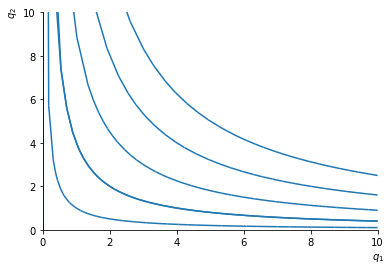

In [21]:
indiff_plot_combo = indiff_plot1
indiff_plot_combo.extend(indiff_plot2)
indiff_plot_combo.extend(indiff_plot3)
indiff_plot_combo.extend(indiff_plot4)
indiff_plot_combo.extend(indiff_plot5)
indiff_plot_combo.show()

We can also change color of a particular curve with the 'line_color' method. 

For some choices of colors, see: https://www.w3schools.com/cssref/css_colors.asp

Be creative, have fun!

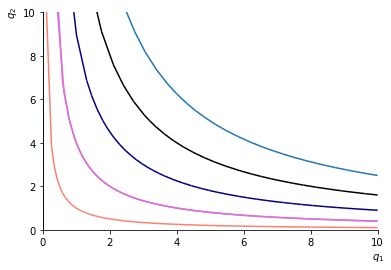

In [22]:
indiff_plot_combo[0].line_color='salmon'
indiff_plot_combo[1].line_color='tomato'
indiff_plot_combo[2].line_color='orchid'
indiff_plot_combo[3].line_color='navy'
indiff_plot_combo[4].line_color='black'
indiff_plot_combo.show()

## Questions and challenges

Q1: Can you try to change the 3rd indifference curve to orange? Fill your answer below.

Q2: Let's explore with slightly different values for the parameter $\alpha$ in the CD utility function. 

* We set it to be $\frac{1}{2}$, can you try some different values? Try start with $\frac{1}{4}$, etc., and then choose "Cell" (from the menu bar above), then "Run All". It might take a while for the entire notebook to be recalculated.

* Observe how the indifference curves change as the value of $\alpha$ changes. 

* When $\alpha$ becomes smaller, which good increases utility more (under similar circumstances)?

* How does your answer correspond to the expressions of marginal utilities?

* How does your answer correspond to the plot of indifference curves above?

Write up your answer below in markdown.

(answer here)

Q3: We introduced MRS as the slope of the indifference curves. Now, given that we derived the explicit expression for a given indifference curve (for CD utility function at least), we can also calculate the slope of the indifference curve from from the explicit expression.
* Do the two expressions agree?
* If not, is there something wrong? Can we reconcile their differences?

Complete this challange by following the following steps.
1. Derive the MRS using the definition given in class.
2. Derive the expression explicitly for the indifference curve.
3. Calculate the slope of the indifference curve from the expression in step 2.
4. Compare the two expressions.
  * Are they identical?
  * Which variables are the arguments of the MRS as a function?
  * Which variables are the arguments of the slope from the indifference curve expression?
5. Can you reconcile these two expressions?

Q3 - Step 1: calculate MRS:

Q3 - Step 2: calculate the expression of the indifference curve:

Q3 - Step 3: calculate the slope of the indifference curve explicitly:

Q3 - Step 4: compare the two expressions.

(answers here)

Q3 - Step 5: try to reconcile the differences. Add calculations if helpful.

(answers here)